In [1]:
import random
import math
import time
import json
import os

import numpy as np
from tqdm import tqdm
from PIL import Image

## read image

In [2]:
img = np.array(Image.open("./lab3_data/mona-lisa-damaged.png"))[:, :, 0]
m, n = img.shape
print(img.shape)
C = [0, 64, 128, 192, 255]

(252, 480)


In [5]:
L = np.ones((m, n, len(C)))
U = np.ones((m, n, len(C)))
D = np.ones((m, n, len(C)))
R = np.ones((m, n, len(C)))
######
phi = np.ones((m, n, len(C)))

g = np.zeros((len(C), len(C)))
for i in range(len(C)):
    for j in range(len(C)):
        g[i, j] = abs(C[i] - C[j])


def q(i, j, k):
    if img[i, j] != 0:
        return abs(img[i, j] - C[k])
    else:
        return 0

#####

def update_left(i, j, k, direction, phi, C):
    values = np.zeros((len(C),))
    for k_ in range(len(C)):
        values[k_] = direction[i, j-1, k_] + 0.5*q(i, j-1, k_) - phi[i, j-1, k_] + g[k_, k]
    return values.max()


def update_upper(i, j, k, direction, phi, C):
    values = np.zeros((len(C),))
    for k_ in range(len(C)):
        values[k_] = direction[i-1, j, k_] + 0.5*q(i-1, j, k_) + phi[i-1, j, k_] + g[k_, k]
    return values.max()

#####

def update_right(i, j, k, direction, phi, C):
    values = np.zeros((len(C),))
    for k_ in range(len(C)):
        values[k_] = direction[i, j+1, k_] + 0.5*q(i, j+1, k_) - phi[i, j+1, k_] + g[k_, k]
    return values.max()


def update_down(i, j, k, direction, phi, C):
    values = np.zeros((len(C),))
    for k_ in range(len(C)):
        values[k_] = direction[i+1, j, k_] + 0.5*q(i+1, j, k_) + phi[i+1, j, k_] + g[k_, k]
    return values.max()

####

def restore_k(i, j, C):
    values = list()
    for k_ in range(len(C)):
        values.append(L[i, j, k_] + R[i, j, k_] + 0.5*q(i, j, k_) - phi[i+1, j, k_])
    return C[values.index(max(values))]

## 10 steps of trw-s

In [6]:
for iteration in tqdm(range(10)):
    # forward
    for i in range(1, m):
        for j in range(1, n):
            for c in range(len(C)):
                L[i, j, c] = update_left(i, j, c, L, phi, C)
                U[i, j, c] = update_upper(i, j, c, U, phi, C)
                phi[i, j, c] = (L[i, j, c] + U[i, j, c] - R[i, j, c] - D[i, j, c])/2
    # backward
    for i in reversed(range(0, m-1)):
        for j in reversed(range(0, n-1)):
            for c in reversed(range(len(C))):
                R[i, j, c] = update_right(i, j, c, R, phi, C)
                D[i, j, c] = update_down(i, j, c, D, phi, C)
                phi[i, j, c] = (L[i, j, c] + U[i, j, c] - R[i, j, c] - D[i, j, c])/2


100%|██████████| 10/10 [23:02<00:00, 138.25s/it]


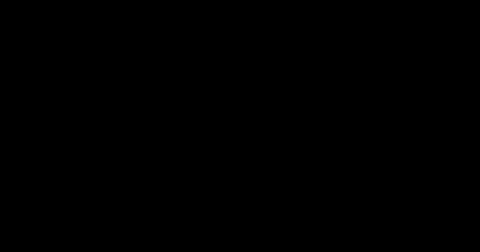

In [7]:
new_img = np.zeros((m,n), dtype=np.uint8)
for i in range(1, m-1):
    for j in range(1, n-1):
        new_img[i, j] = restore_k(i, j, C)
Image.fromarray(new_img)